<a href="https://colab.research.google.com/github/santosh9382/python_SQLCODE/blob/main/sandecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

# New Section

In [6]:
data = pd.read_csv('/content/golf.csv')

In [7]:
data

,Outlook,Temp,Humidity,Windy,Play Golf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes
5,Sunny,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Rainy,Mild,High,False,No
8,Rainy,Cool,Normal,False,Yes
9,Sunny,Mild,Normal,False,Yes


In [8]:
data.columns

Index(['Outlook', 'Temp', 'Humidity', 'Windy', 'Play Golf'], dtype='object')

In [9]:
data.columns=['Outlook','Temp','Humidity','Windy','PlayGolf']

In [10]:
data.columns

Index(['Outlook', 'Temp', 'Humidity', 'Windy', 'PlayGolf'], dtype='object')

In [11]:
data.head()

,Outlook,Temp,Humidity,Windy,PlayGolf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes


In [12]:
data['Outlook'].unique()

array(['Rainy', 'Overcast', 'Sunny'], dtype=object)

In [13]:
out={'Rainy':0,'Overcast':1,'Sunny':2}

In [14]:
data['Outlook']=data['Outlook'].map(lambda x:out[x])
data.head()

,Outlook,Temp,Humidity,Windy,PlayGolf
0,0,Hot,High,False,No
1,0,Hot,High,True,No
2,1,Hot,High,False,Yes
3,2,Mild,High,False,Yes
4,2,Cool,Normal,False,Yes


In [15]:
out={'Hot':0,'Mild':1,'Cool':2}
data['Temp']=data['Temp'].map(lambda x:out[x])
data.head()

,Outlook,Temp,Humidity,Windy,PlayGolf
0,0,0,High,False,No
1,0,0,High,True,No
2,1,0,High,False,Yes
3,2,1,High,False,Yes
4,2,2,Normal,False,Yes


In [19]:
out={'High':0,'Normal':1}
data['Humidity']=data['Humidity'].map(lambda x:out[x])
data.head()

KeyError: 0

In [18]:
data['Windy']=data['Windy'].map(lambda x: 0 if x =='False' else 1)
data.head()

,Outlook,Temp,Humidity,Windy,PlayGolf
0,0,0,0,1,No
1,0,0,0,1,No
2,1,0,0,1,Yes
3,2,1,0,1,Yes
4,2,2,1,1,Yes


In [20]:
data['PlayGolf']=data['PlayGolf'].map(lambda x: 0 if x =='No' else 1)
data.head()

,Outlook,Temp,Humidity,Windy,PlayGolf
0,0,0,0,1,0
1,0,0,0,1,0
2,1,0,0,1,1
3,2,1,0,1,1
4,2,2,1,1,1


In [21]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [23]:
model.fit(data.iloc[:,1:4],data.iloc[:,4])

DecisionTreeClassifier()

In [24]:
from sklearn import tree
from matplotlib import pyplot as plt

[Text(0.5, 0.8333333333333334, 'x[1] <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]'), Text(0.25, 0.5, 'x[0] <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'), Text(0.125, 0.16666666666666666, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'), Text(0.375, 0.16666666666666666, 'gini = 0.5\nsamples = 4\nvalue = [2, 2]'), Text(0.75, 0.5, 'x[0] <= 1.5\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'), Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'), Text(0.875, 0.16666666666666666, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]')]


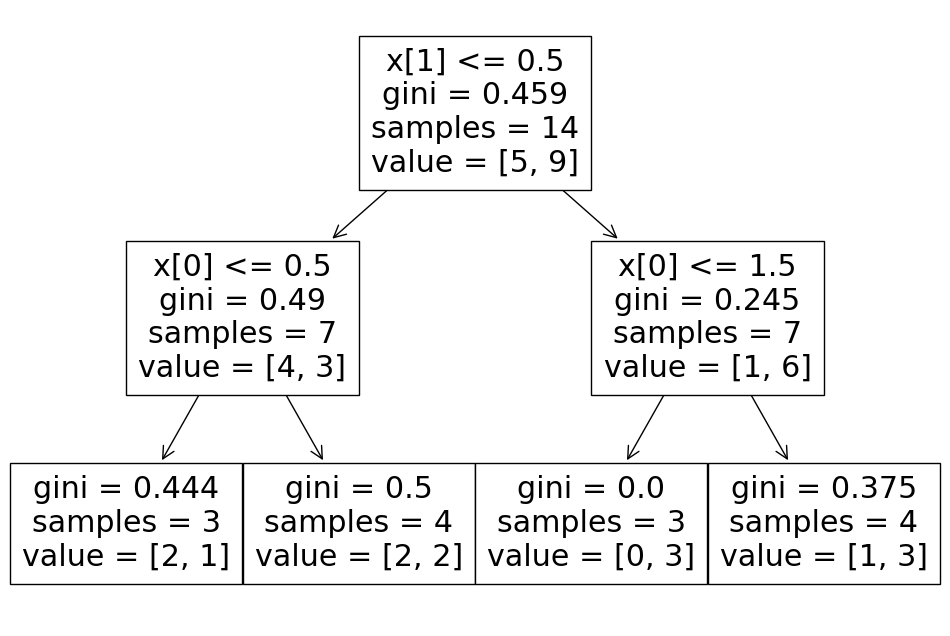

In [29]:
plt.figure(figsize=(12,8))
print(tree.plot_tree(model))

In [30]:
from sklearn.tree import export_graphviz

In [ ]:
feature_names=['Outlook','Temp','Humidity','Windy']
out=['No','Yes']
dot=export_graphviz(decision_tree=model,outfile='golf.dot',feature_names,class_names=out)

In [ ]:
! dot -T png golf.dot -o tree.png